In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import matplotlib
matplotlib.style.use('ggplot')
import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('drive', force_remount=True)

Mounted at drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/train.csv")
df.head()

<ipython-input-7-8454a5ec9b4e>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df = df.drop(columns=['ID', 'Customer_ID', 'Month', 'Monthly_Inhand_Salary', 'Name', 'Age', 'SSN', 'Type_of_Loan','Occupation'], axis = 1)
df.tail(5)

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,39628.99,4,6,7,2,23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,39628.99,4,6,7,2,18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,39628.99,4,6,5729,2,27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,39628.99,4,6,7,2,20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,39628.99_,4,6,7,2,18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [ ]:
columns = [
    'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance'
]
for col in columns:
    print("\n")
    print(df[col].describe())
    print(df[col].unique())



count       100000
unique       18940
top       36585.12
freq            16
Name: Annual_Income, dtype: object
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']


count     100000
unique       434
top            3
freq       14386
Name: Num_of_Loan, dtype: object
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33' '193' '699' '329' '1451' '484' '132'
 '649' '995' '545' '684' '1135' '1094' '1204' '654' '58' '348' '614'
 '1363' '323' '1406' '1348' '430' '153' '1461' '905' '1312' '1424' '1154'
 '95' '1353' '1228' '819' '1006' '795' '359' '1209' '590' '696' '1185_'
 '1465' '911' '1181' '70' '816' '1369' '143' '1416' '

In [ ]:
for col in columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    print("\n")
    print(df[col].info())



<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Annual_Income
Non-Null Count  Dtype  
--------------  -----  
93020 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_of_Loan
Non-Null Count  Dtype  
--------------  -----  
95215 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_of_Delayed_Payment
Non-Null Count  Dtype  
--------------  -----  
90254 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Changed_Credit_Limit
Non-Null Count  Dtype  
--------------  -----  
97909 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_

In [ ]:
df.shape

(100000, 19)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 19)


In [ ]:
df.count()

,0
Annual_Income,93020
Num_Bank_Accounts,100000
Num_Credit_Card,100000
Interest_Rate,100000
Num_of_Loan,95215
Delay_from_due_date,100000
Num_of_Delayed_Payment,90254
Changed_Credit_Limit,97909
Num_Credit_Inquiries,98035
Credit_Mix,100000


In [ ]:
print(df.isnull().sum())

Annual_Income               6980
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                 4785
Delay_from_due_date            0
Num_of_Delayed_Payment      9746
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt            1009
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     8784
Payment_Behaviour              0
Monthly_Balance             1209
Credit_Score                   0
dtype: int64


In [ ]:
df = df.dropna()    # Dropping the missing values.
df.count()

,0
Annual_Income,62305
Num_Bank_Accounts,62305
Num_Credit_Card,62305
Interest_Rate,62305
Num_of_Loan,62305
Delay_from_due_date,62305
Num_of_Delayed_Payment,62305
Changed_Credit_Limit,62305
Num_Credit_Inquiries,62305
Credit_Mix,62305


In [ ]:
print(df.isnull().sum())   # After dropping the values

Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [ ]:
def age_to_days(age):
    if age is np.nan:
        return age
    years = 0
    months = 0
    years_match = re.search(r'(\d+)\s*Years?', age)
    months_match = re.search(r'(\d+)\s*Months?', age)
    if years_match:
        years = int(years_match.group(1))
    if months_match:
        months = int(months_match.group(1))
    return (years * 365) + (months * 30)

df['Credit_History_Age'] = df['Credit_History_Age'].apply(age_to_days)
df['Credit_History_Age'].info()

<class 'pandas.core.series.Series'>
Index: 62305 entries, 0 to 99997
Series name: Credit_History_Age
Non-Null Count  Dtype
--------------  -----
62305 non-null  int64
dtypes: int64(1)
memory usage: 973.5 KB


In [ ]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', 'Standard')
df['Credit_Mix'].unique()

array(['Standard', 'Good', 'Bad'], dtype=object)

In [ ]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
credit_score_le = LabelEncoder()
df['Credit_Score'] = credit_score_le.fit_transform(df['Credit_Score'])
df['Credit_Score'].info()
df['Credit_Score'].unique()

<class 'pandas.core.series.Series'>
Index: 62305 entries, 0 to 99997
Series name: Credit_Score
Non-Null Count  Dtype
--------------  -----
62305 non-null  int64
dtypes: int64(1)
memory usage: 973.5 KB


array([0, 2, 1])

In [ ]:
objectList = ['Payment_of_Min_Amount','Payment_of_Min_Amount','Payment_Behaviour', 'Credit_Mix']
for i in objectList:
  df[i].unique()
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i])
  df[i].info()
  df[i].unique()

<class 'pandas.core.series.Series'>
Index: 62305 entries, 0 to 99997
Series name: Payment_of_Min_Amount
Non-Null Count  Dtype
--------------  -----
62305 non-null  int64
dtypes: int64(1)
memory usage: 973.5 KB
<class 'pandas.core.series.Series'>
Index: 62305 entries, 0 to 99997
Series name: Payment_of_Min_Amount
Non-Null Count  Dtype
--------------  -----
62305 non-null  int64
dtypes: int64(1)
memory usage: 973.5 KB
<class 'pandas.core.series.Series'>
Index: 62305 entries, 0 to 99997
Series name: Payment_Behaviour
Non-Null Count  Dtype
--------------  -----
62305 non-null  int64
dtypes: int64(1)
memory usage: 973.5 KB
<class 'pandas.core.series.Series'>
Index: 62305 entries, 0 to 99997
Series name: Credit_Mix
Non-Null Count  Dtype
--------------  -----
62305 non-null  int64
dtypes: int64(1)
memory usage: 973.5 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62305 entries, 0 to 99997
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             62305 non-null  float64
 1   Num_Bank_Accounts         62305 non-null  int64  
 2   Num_Credit_Card           62305 non-null  int64  
 3   Interest_Rate             62305 non-null  int64  
 4   Num_of_Loan               62305 non-null  float64
 5   Delay_from_due_date       62305 non-null  int64  
 6   Num_of_Delayed_Payment    62305 non-null  float64
 7   Changed_Credit_Limit      62305 non-null  float64
 8   Num_Credit_Inquiries      62305 non-null  float64
 9   Credit_Mix                62305 non-null  int64  
 10  Outstanding_Debt          62305 non-null  float64
 11  Credit_Utilization_Ratio  62305 non-null  float64
 12  Credit_History_Age        62305 non-null  int64  
 13  Payment_of_Min_Amount     62305 non-null  int64  
 14  Total_EMI_p

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


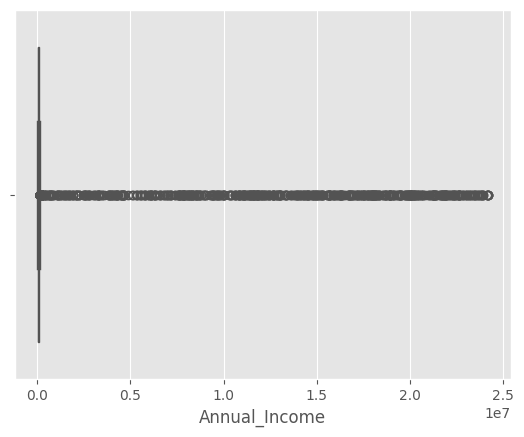

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


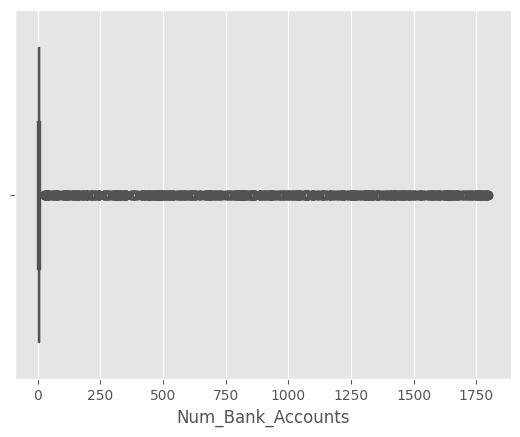

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


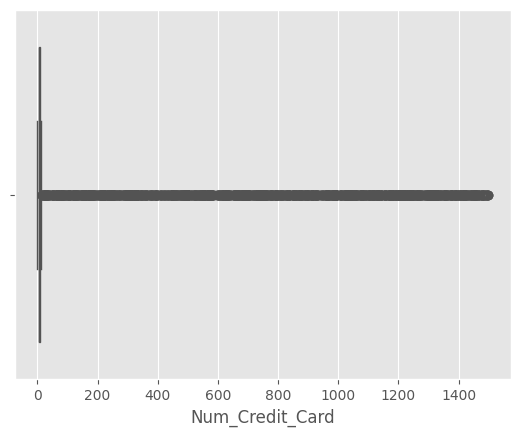

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


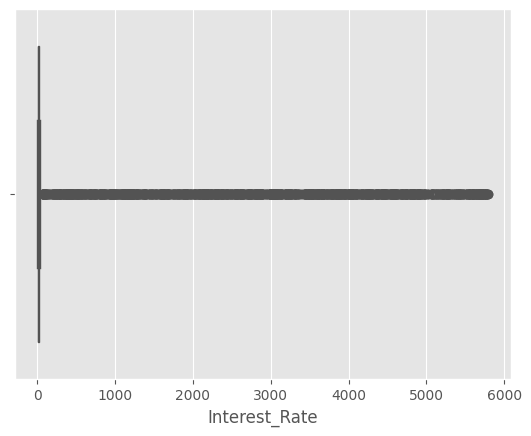

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


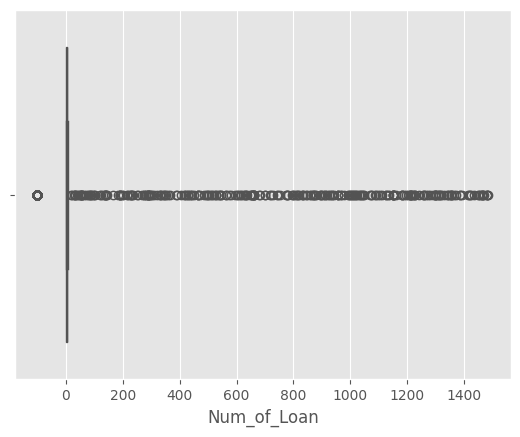

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


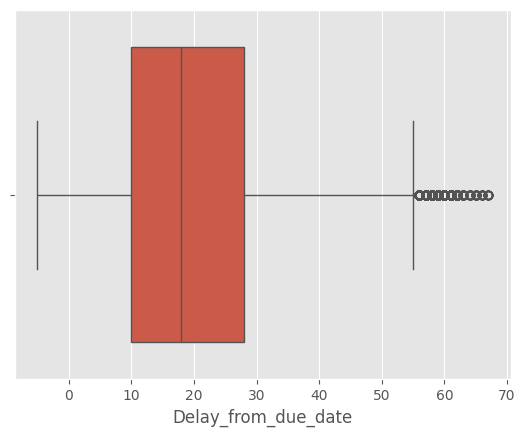

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


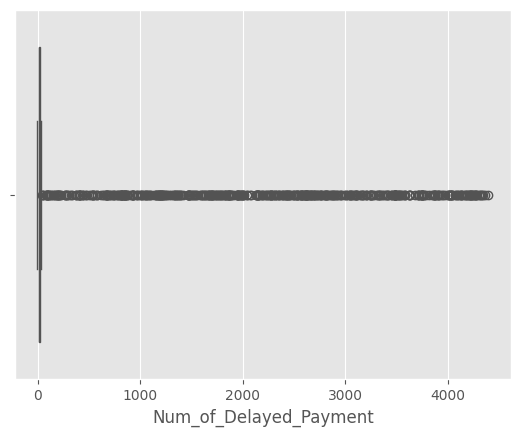

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


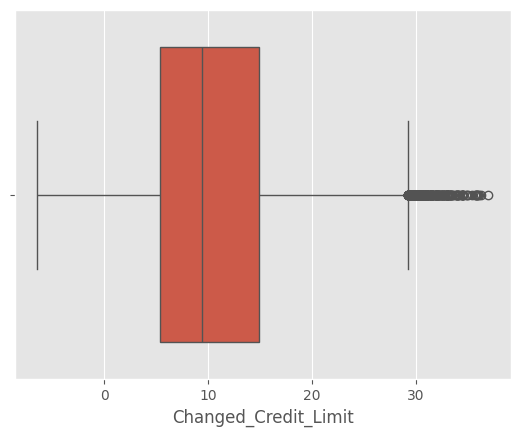

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


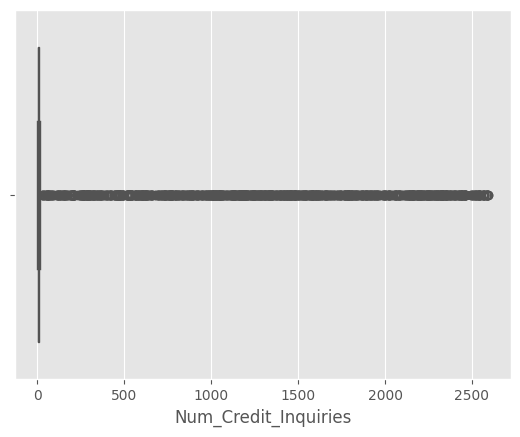

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


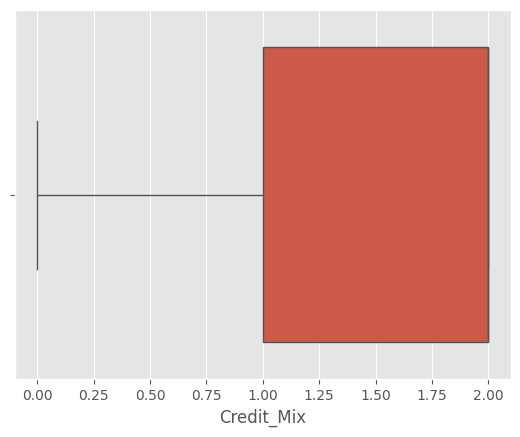

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


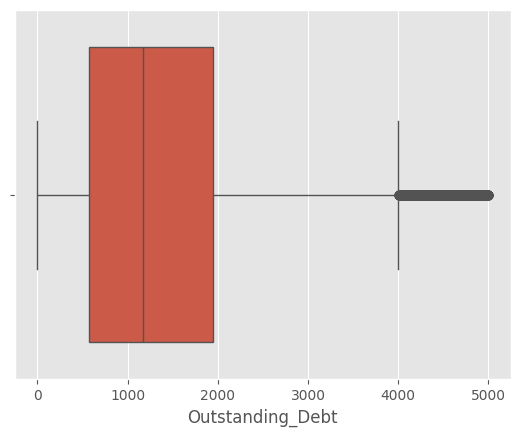

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


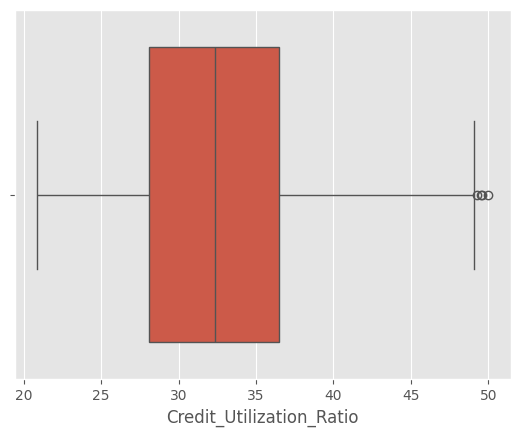

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


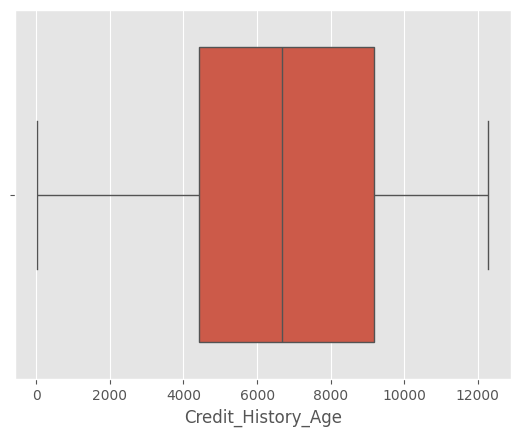

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


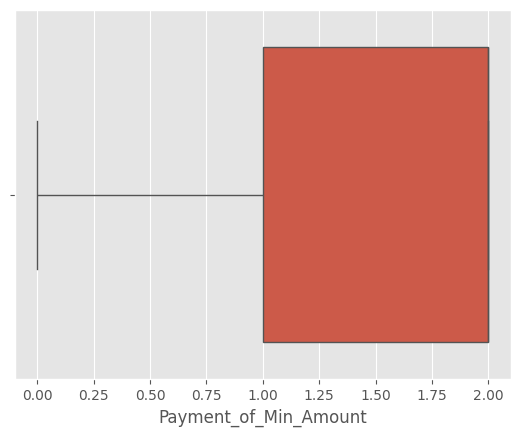

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


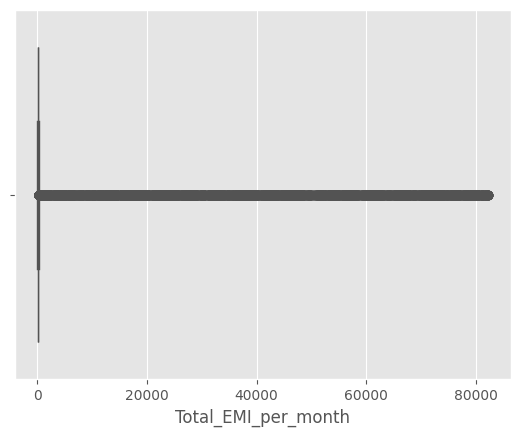

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


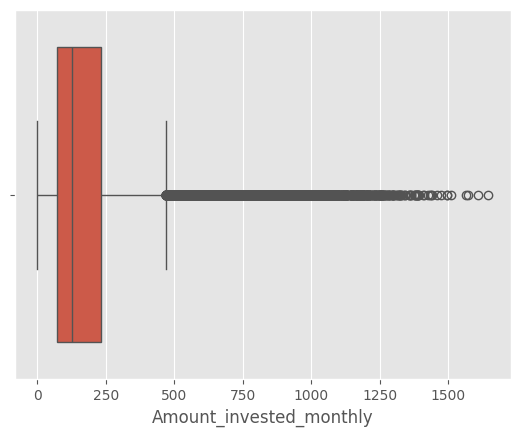

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


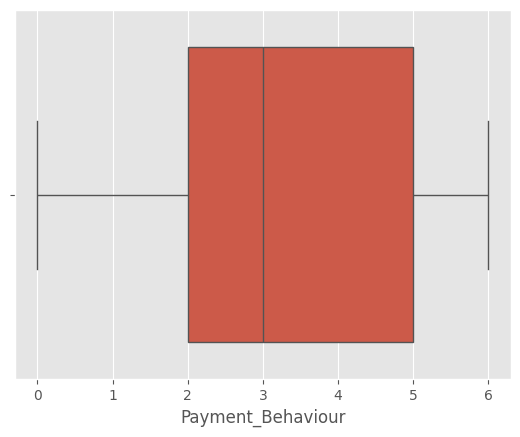

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


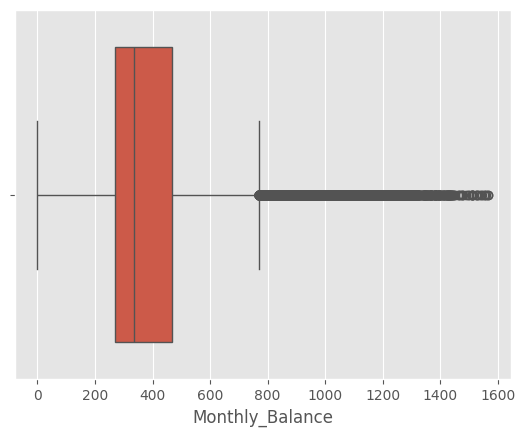

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


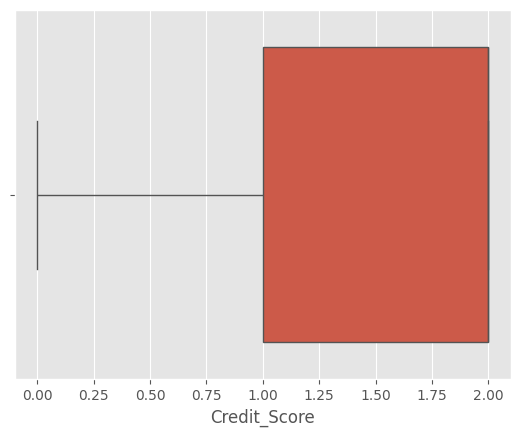

<Figure size 640x480 with 0 Axes>

In [ ]:
columns = [
    "Annual_Income",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Interest_Rate",
    "Num_of_Loan",
    "Delay_from_due_date",
    "Num_of_Delayed_Payment",
    "Changed_Credit_Limit",
    "Num_Credit_Inquiries",
    "Credit_Mix",
    "Outstanding_Debt",
    "Credit_Utilization_Ratio",
    "Credit_History_Age",
    "Payment_of_Min_Amount",
    "Total_EMI_per_month",
    "Amount_invested_monthly",
    "Payment_Behaviour",
    "Monthly_Balance",
    "Credit_Score"
]

for i in columns:
  try:
    sns.boxplot(x=df[i])
    plt.figure()
    plt.show()
  except Exception as e:
    print('')


In [ ]:
numeric_cols = df.columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Annual_Income               52779.180000
Num_Bank_Accounts               4.000000
Num_Credit_Card                 3.000000
Interest_Rate                  12.000000
Num_of_Loan                     4.000000
Delay_from_due_date            18.000000
Num_of_Delayed_Payment          9.000000
Changed_Credit_Limit            9.530000
Num_Credit_Inquiries            6.000000
Credit_Mix                      1.000000
Outstanding_Debt             1372.020000
Credit_Utilization_Ratio        8.422811
Credit_History_Age           4775.000000
Payment_of_Min_Amount           1.000000
Total_EMI_per_month           126.414480
Amount_invested_monthly       159.120475
Payment_Behaviour               3.000000
Monthly_Balance               199.390177
Credit_Score                    1.000000
dtype: float64


In [ ]:
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |(df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(38804, 19)

<ipython-input-26-6ec61a140721>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_Score', data=df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 l

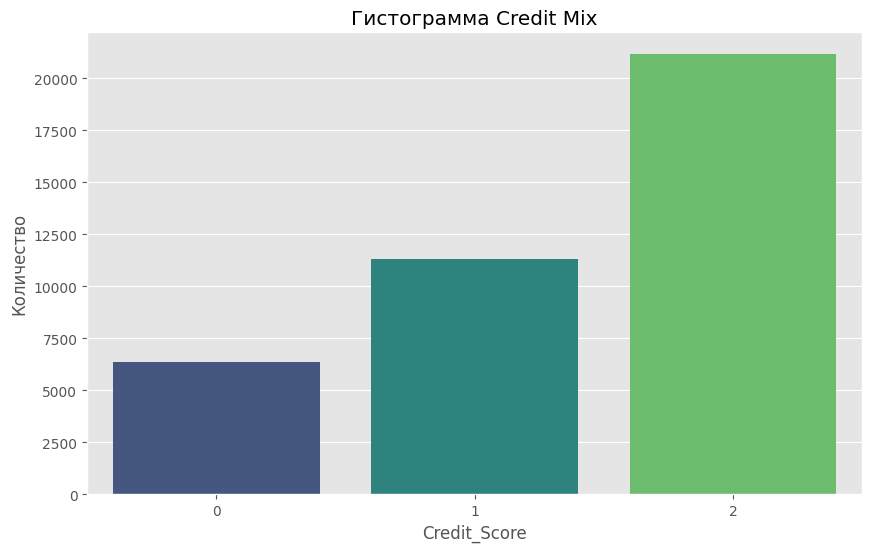

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', data=df, palette='viridis')
plt.title('Гистограмма Credit Mix')
plt.xlabel('Credit_Score')
plt.ylabel('Количество')
plt.show()

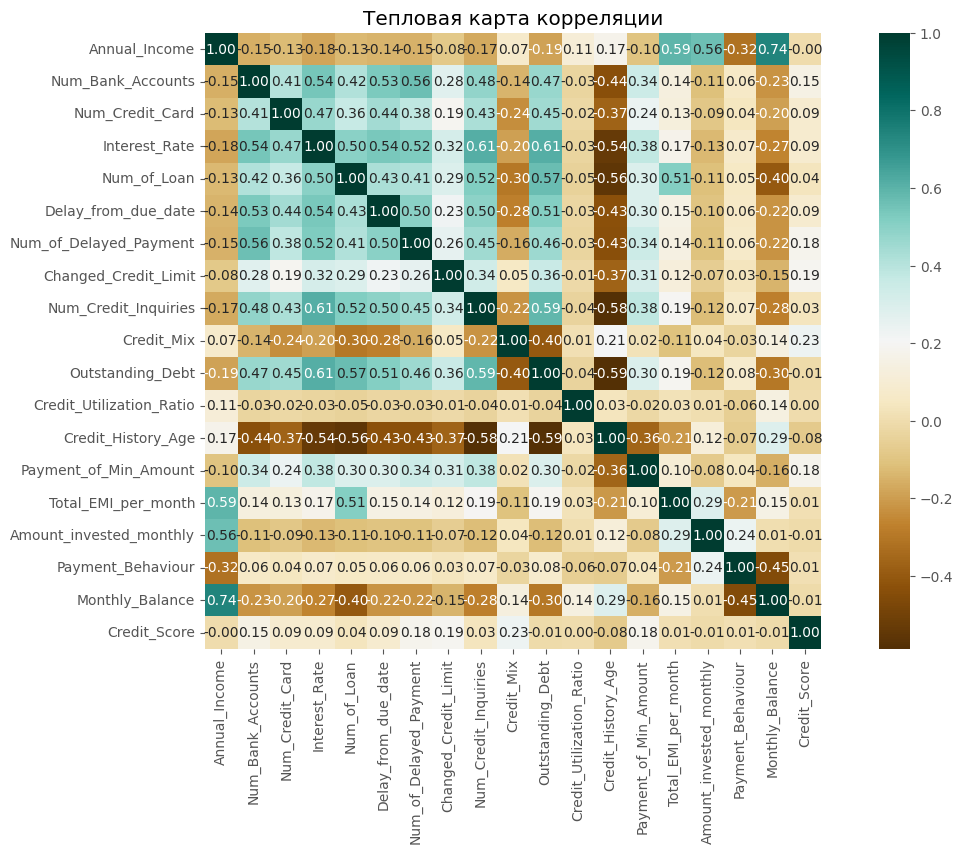

In [ ]:
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f', square=True)
plt.title('Тепловая карта корреляции')
plt.show()
#убрать мес дохож

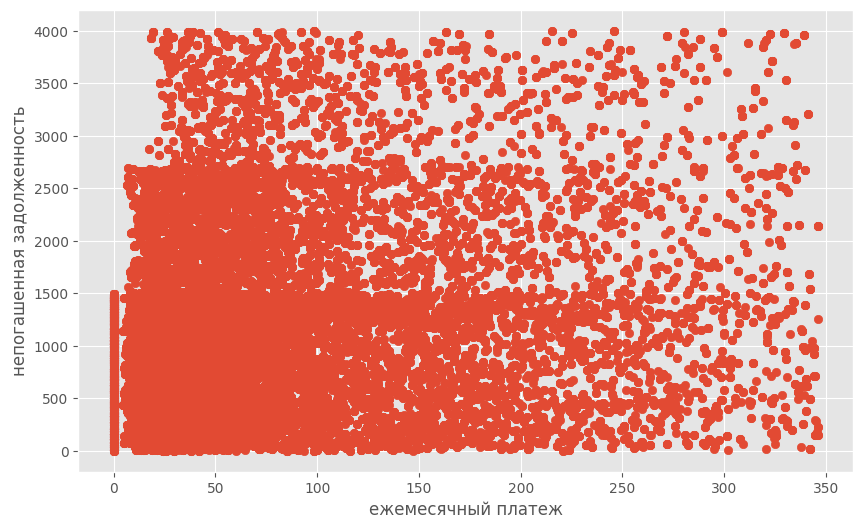

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Total_EMI_per_month'], df['Outstanding_Debt'])
ax.set_xlabel('ежемесячный платеж')
ax.set_ylabel('непогашенная задолженность')
plt.show()

# **Разделение на выборки и стандартизация**

In [ ]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [ ]:
X

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,19114.12,3,4,3,4.0,3,7.0,11.27,4.0,2,809.98,26.822620,8060,1,49.574949,80.415295,3,312.494089
3,19114.12,3,4,3,4.0,5,4.0,6.27,4.0,1,809.98,31.377862,8150,1,49.574949,199.458074,6,223.451310
5,19114.12,3,4,3,4.0,8,4.0,9.27,4.0,1,809.98,27.262259,8210,1,49.574949,62.430172,0,340.479212
8,34847.84,2,4,6,1.0,3,4.0,5.42,2.0,1,605.03,24.464031,9700,1,18.816215,104.291825,6,470.690627
9,34847.84,2,4,6,1.0,7,1.0,7.42,2.0,1,605.03,38.550848,9730,1,18.816215,40.391238,1,484.591214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,20002.88,10,8,29,5.0,33,25.0,16.31,9.0,0,3571.70,33.359987,2220,2,60.964772,74.366603,0,307.659291
99991,20002.88,10,8,29,5.0,33,25.0,18.31,9.0,0,3571.70,37.140784,2280,2,60.964772,34.662906,1,337.362988
99994,39628.99,4,6,7,2.0,20,6.0,9.50,3.0,2,502.38,39.323569,11465,1,35.104023,140.581403,2,410.256158
99995,39628.99,4,6,7,2.0,23,7.0,11.50,3.0,2,502.38,34.663572,11495,1,35.104023,60.971333,1,479.866228


In [ ]:
y

,Credit_Score
0,0
3,0
5,0
8,2
9,0
...,...
99989,2
99991,2
99994,1
99995,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Метод k средних**
Подбор наилучшего k:

In [ ]:
# Определение диапазона k
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Преобразование y_train в NumPy массив
y_train = np.asarray(y_train)

# Определяем количество соседей для проверки

k_values = range(1, 11)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Словарь для хранения средней точности для разных k
accuracy_avg = {}

for k in k_values:
    accuracy_scores = []

    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

        # Обучение модели K-Neighbors Classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_fold_train, y_fold_train)

        # Оценка качества классификации на валидационной выборке
        predictions = knn.predict(X_fold_val)
        score = accuracy_score(y_fold_val, predictions)
        accuracy_scores.append(score)

    # Сохранение средней точности для текущего k
    accuracy_avg[k] = np.mean(accuracy_scores)

# Нахождение k с наилучшей средней точностью
best_k = max(accuracy_avg, key=accuracy_avg.get)
print(f'Лучшее значение k: {best_k} с точностью: {accuracy_avg[best_k]}')

Лучшее значение k: 10 с точностью: 0.7074057051370393


In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Предсказание и оценка
y_pred_best = knn_best.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Точность модели: {final_accuracy * 100:.2f}%")
print("Классификационный отчет:\n", classification_report(y_test, y_pred_best))

Точность модели: 71.42%
Классификационный отчет:
               precision    recall  f1-score   support

           0       0.57      0.60      0.58      1264
           1       0.70      0.70      0.70      2214
           2       0.77      0.75      0.76      4283

    accuracy                           0.71      7761
   macro avg       0.68      0.69      0.68      7761
weighted avg       0.72      0.71      0.72      7761



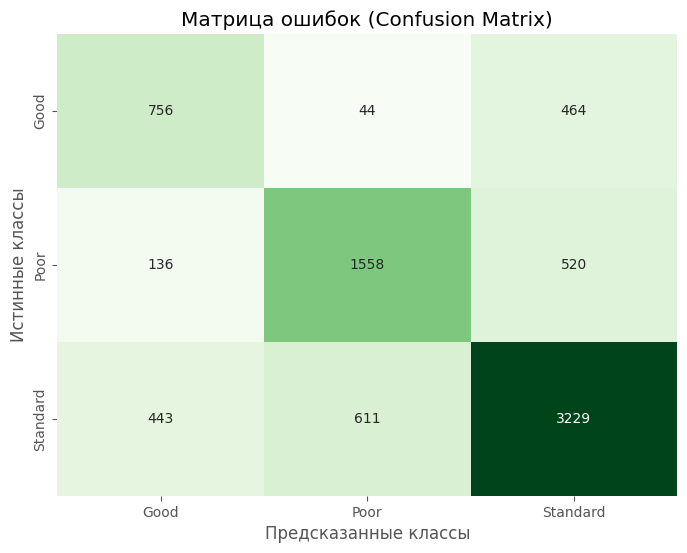

In [ ]:
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, xticklabels=credit_score_le.inverse_transform([0, 1, 2]), yticklabels=credit_score_le.inverse_transform([0, 1, 2]))
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок (Confusion Matrix)')
plt.show();

# **Машина опорных векторов (SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Применение PCA (уменьшение размерности с сохранением 90% дисперсии)
pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Настройка гиперпараметров SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Инициализация и настройка SVM через GridSearchCV
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train_pca, y_train)

# Лучшая модель
best_svc = grid_search.best_estimator_

# Предсказания на тестовых данных
y_pred = best_svc.predict(X_test_pca)

# Оценка модели
print(f"Точность модели: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Классификационный отчет:\n", classification_report(y_test, y_pred))


In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Визуализация теплокарты
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, xticklabels=credit_score_le.inverse_transform([0, 1, 2]), yticklabels=credit_score_le.inverse_transform([0, 1, 2]))
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок (Confusion Matrix)')
plt.show()

# **Случайный лес**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state = 42,
                                  n_estimators = 100,# число деревьев
                                  max_depth = 50)# глубина
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
from sklearn import metrics
print(f"Точность модели: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(metrics.classification_report(y_test, y_pred))

Точность модели: 78.51%
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1264
           1       0.77      0.79      0.78      2214
           2       0.82      0.81      0.81      4283

    accuracy                           0.79      7761
   macro avg       0.76      0.77      0.76      7761
weighted avg       0.79      0.79      0.79      7761



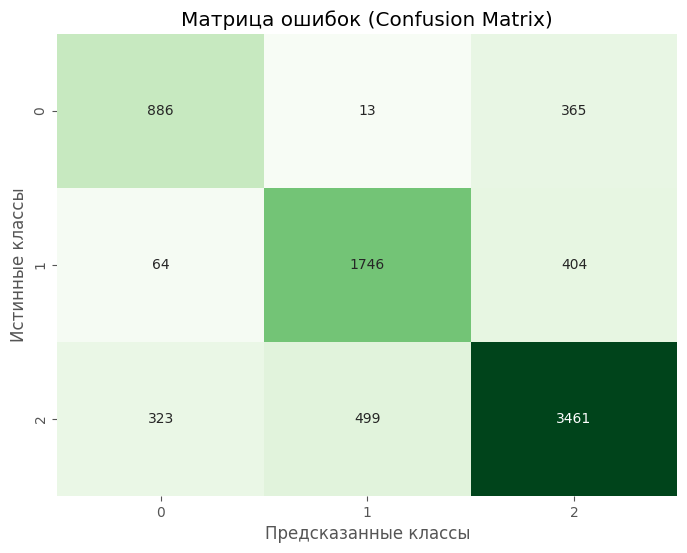

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Визуализация теплокарты
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок (Confusion Matrix)')
plt.show()

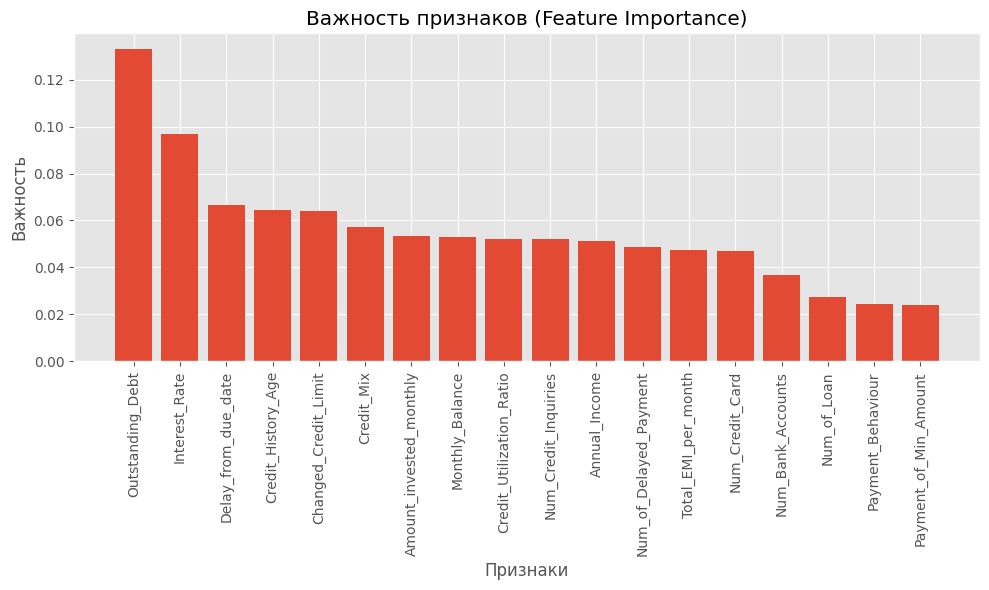

In [ ]:
feature_importances = model_rf.feature_importances_

# Визуализация важности признаков
features = X.columns  # Если у вас есть названия признаков в df
indices = np.argsort(feature_importances)[::-1]  # Сортировка по убыванию важности

plt.figure(figsize=(10, 6))
plt.title("Важность признаков (Feature Importance)")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.tight_layout()
plt.show()